In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go  # Import Plotly graph objects
import plotly.express as px  # Import Plotly Express

In [60]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [4]:
# Mounting google drive account in colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/missing_value_impute_gurgaon_real_estate.csv').drop_duplicates()

In [63]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,dlf regal gardens,sector 90,1.26,7403.0,3.0,3.0,3,6.0,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
1,flat,tulip violet,sector 69,1.72,8730.0,4.0,4.0,1,12.0,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,flat,experion the heartsong,sector 108,2.28,8204.0,4.0,5.0,3+,8.0,Relatively New,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,flat,signature global city 92,sector 92,0.78,8047.0,2.0,2.0,2,2.0,New Property,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,flat,puri diplomatic greens,sector 111,3.45,11694.0,4.0,5.0,3+,10.0,Relatively New,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0


In [64]:
df.shape

(3732, 18)

In [65]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [66]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 90,1.26,3.0,3.0,3,6.0,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
1,flat,sector 69,1.72,4.0,4.0,1,12.0,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,flat,sector 108,2.28,4.0,5.0,3+,8.0,Relatively New,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,flat,sector 92,0.78,2.0,2.0,2,2.0,New Property,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,flat,sector 111,3.45,4.0,5.0,3+,10.0,Relatively New,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3732 entries, 0 to 3735
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3732 non-null   object 
 1   sector           3732 non-null   object 
 2   price            3732 non-null   float64
 3   bedRoom          3732 non-null   float64
 4   bathroom         3732 non-null   float64
 5   balcony          3732 non-null   object 
 6   floorNum         3732 non-null   float64
 7   agePossession    3732 non-null   object 
 8   builtup_area     3732 non-null   float64
 9   study room       3732 non-null   float64
 10  servant room     3732 non-null   float64
 11  store room       3732 non-null   float64
 12  pooja room       3732 non-null   float64
 13  others           3732 non-null   float64
 14  furnishing_type  3732 non-null   float64
 15  luxury_score     3732 non-null   float64
dtypes: float64(12), object(4)
memory usage: 495.7+ KB


In [68]:
train_df.select_dtypes(include=['float64']).head()

,price,bedRoom,bathroom,floorNum,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,1.26,3.0,3.0,6.0,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0
1,1.72,4.0,4.0,12.0,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2.28,4.0,5.0,8.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0
3,0.78,2.0,2.0,2.0,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0
4,3.45,4.0,5.0,10.0,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0


<Axes: >

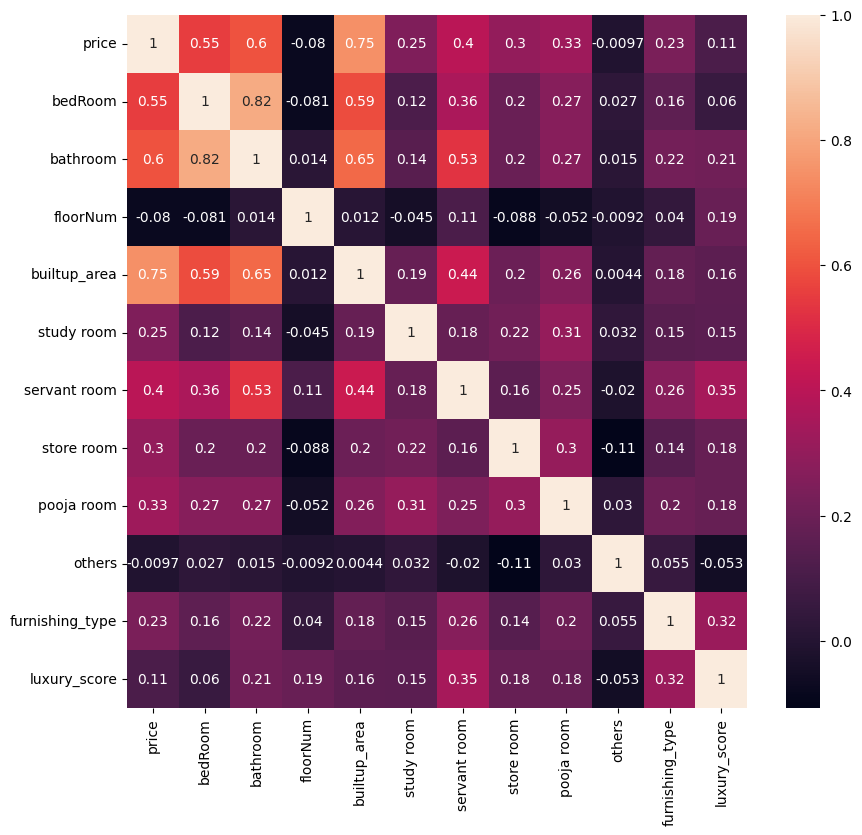

In [69]:
plt.figure(figsize=(10,9))
sns.heatmap(train_df.select_dtypes(include=['float64']).corr(),annot=True)


In [70]:
train_df.select_dtypes(include=['float64']).corr()['price'].sort_values(ascending=False)

price              1.000000
builtup_area       0.747334
bathroom           0.601493
bedRoom            0.554442
servant room       0.399886
pooja room         0.327551
store room         0.301299
study room         0.251768
furnishing_type    0.234954
luxury_score       0.112231
others            -0.009658
floorNum          -0.079721
Name: price, dtype: float64

In [ ]:
# luxury score

In [71]:
fig = px.box(x=df['luxury_score'])
fig.show()

In [72]:
train_df['luxury_score'].describe()

count    3732.000000
mean       70.156752
std        53.389752
min         0.000000
25%        29.000000
50%        57.000000
75%       109.000000
max       174.000000
Name: luxury_score, dtype: float64

In [73]:
# categorising luxury_score feature

def cat_luxury(x):
  if 0 <= x < 30:
    return 'Low'
  elif 30 <= x < 110:
    return 'Medium'
  elif 110<= x < 175:
    return 'High'
  else:
    return None


In [74]:
train_df['luxury_category'] = train_df['luxury_score'].apply(cat_luxury)

In [75]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 90,1.26,3.0,3.0,3,6.0,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,Low
1,flat,sector 69,1.72,4.0,4.0,1,12.0,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,Medium
2,flat,sector 108,2.28,4.0,5.0,3+,8.0,Relatively New,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,Medium
3,flat,sector 92,0.78,2.0,2.0,2,2.0,New Property,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,Medium
4,flat,sector 111,3.45,4.0,5.0,3+,10.0,Relatively New,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0,Medium


In [ ]:
# floorNum

In [76]:
df['floorNum'].describe()

count    3732.000000
mean        6.711683
std         6.034649
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [ ]:
# categorising floorNum feature

def cat_floor(x):
  if 0 <= x < 3:
    return 'Low Floor'
  elif 3 <= x < 11:
    return 'Mid Floor'
  elif 11<= x < 52:
    return 'High Floor'
  else:
    return None


In [77]:
train_df['floor_category'] = train_df['floorNum'].apply(cat_luxury)

In [78]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 90,1.26,3.0,3.0,3,6.0,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,28.0,Low,Low
1,flat,sector 69,1.72,4.0,4.0,1,12.0,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,Medium,Low
2,flat,sector 108,2.28,4.0,5.0,3+,8.0,Relatively New,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,Medium,Low
3,flat,sector 92,0.78,2.0,2.0,2,2.0,New Property,1083.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,Medium,Low
4,flat,sector 111,3.45,4.0,5.0,3+,10.0,Relatively New,2669.0,0.0,1.0,0.0,0.0,0.0,0.0,101.0,Medium,Low


In [79]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [80]:
train_df.head(2)

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 90,1.26,3.0,3.0,3,Relatively New,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,Low,Low
1,flat,sector 69,1.72,4.0,4.0,1,Relatively New,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low


In [81]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns



In [82]:
categorical_cols

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [83]:
# Apply label encoding to categorical columns

for i in categorical_cols:
    ordinal_encoder = OrdinalEncoder()
    data_label_encoded[i] = ordinal_encoder.fit_transform(data_label_encoded[[i]])
    print(ordinal_encoder.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['bhora kalan', 'bissar', 'damdma', 'delhi ncr', 'farukhnagar',
       'khandsa', 'patel nagar', 'sector 1', 'sector 10', 'sector 102',
       'sector 103', 'sector 104', 'sector 105', 'sector 106',
       'sector 107', 'sector 108', 'sector 109', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 2', 'sector 21', 'sector 22', 'sector 23', 'sector 24',
       'sector 25', 'sector 26', 'sector 27', 'sector 28', 'sector 29',
       'sector 3', 'sector 30', 'sector 31', 'sector 32', 'sector 33',
       'sector 35', 'sector 36', 'sector 37', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 42', 'sector 43',
       'sector 45', 'sector 46', 'sector 47', 'sector 48', 'sector 49',
       'sector 5', 'sector 50', 'sector 51', 'sector 52', 'sector 53',
       'sector 54', 'sector 55', 'sector 56', 'sector 57

In [84]:
# separating input and output
#price is the target column

x_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

In [85]:
x_label.head(2)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,builtup_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,99.0,3.0,3.0,3.0,3.0,1603.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,77.0,4.0,4.0,1.0,3.0,1783.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [86]:
y_label.head(2)

0    1.26
1    1.72
Name: price, dtype: float64

In [ ]:
# Feature selection

In [103]:
# technique 1

data_label_encoded.corr()['price'].sort_values(ascending=False)

#ignore encoded categorical col

price              1.000000
builtup_area       0.747334
bathroom           0.601493
bedRoom            0.554442
property_type      0.456508
servant room       0.399886
pooja room         0.327551
store room         0.301299
balcony            0.271866
study room         0.251768
furnishing_type    0.234954
floor_category     0.029943
others            -0.009658
luxury_category   -0.081289
agePossession     -0.124121
sector            -0.181853
Name: price, dtype: float64

In [93]:
data_label_encoded.corr(method='spearman')['price'].sort_values(ascending=False)

#ignore encoded categorical col

price              1.000000
builtup_area       0.818030
bathroom           0.694246
bedRoom            0.649963
servant room       0.511165
balcony            0.463099
property_type      0.304868
furnishing_type    0.296969
pooja room         0.256771
store room         0.235252
study room         0.197975
floor_category     0.075052
others            -0.005682
agePossession     -0.085391
luxury_category   -0.105063
sector            -0.264452
Name: price, dtype: float64

In [94]:
!pip install dcor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.5 MB/s eta 0:00:00


In [95]:
import dcor

In [102]:
dcor.distance_correlation(data_label_encoded[['builtup_area','bathroom']], df['price'])

0.7663059379180265

In [137]:
# technique 2 Random Forest feature importance

from sklearn.ensemble import RandomForestRegressor

# training regressor including the labeled encoded data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_label, y_label)

RandomForestRegressor(random_state=42)

In [106]:
np.set_printoptions(suppress=True)

In [138]:
# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': x_label.columns,
    'rf_importance': rf_regressor.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,builtup_area,0.659940
1,sector,0.101341
0,property_type,0.090021
3,bathroom,0.038511
8,servant room,0.017089
2,bedRoom,0.017084
4,balcony,0.016336
5,agePossession,0.014657
12,furnishing_type,0.013150
13,luxury_category,0.008084


In [139]:
# technique 3 - Gradient boosting feature importance

from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(x_label, y_label)

GradientBoostingRegressor()

In [141]:
# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,builtup_area,0.718460
0,property_type,0.095000
1,sector,0.091523
3,bathroom,0.038505
8,servant room,0.019657
2,bedRoom,0.015198
12,furnishing_type,0.006963
9,store room,0.005584
10,pooja room,0.001937
7,study room,0.001726


In [121]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_label, y_label)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [142]:
# Extract feature importance scores for label encoded data
fi_df4 = pd.DataFrame({
    'feature': x_label.columns,
    'xgb_importance': model.feature_importances_
}).sort_values(by='xgb_importance', ascending=False)

fi_df4

,feature,xgb_importance
6,builtup_area,0.334057
0,property_type,0.228253
8,servant room,0.099776
3,bathroom,0.058751
1,sector,0.056207
7,study room,0.043260
2,bedRoom,0.033312
12,furnishing_type,0.029936
9,store room,0.026848
11,others,0.018732


In [145]:
# Permutation importance

from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(x_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)


In [146]:
# Organize results into a DataFrame
fi_df5 = pd.DataFrame({
    'feature': x_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df5

,feature,permutation_importance
6,builtup_area,0.744200
0,property_type,0.187144
1,sector,0.126588
8,servant room,0.020919
3,bathroom,0.015924
2,bedRoom,0.012197
4,balcony,0.006440
12,furnishing_type,0.004327
7,study room,0.003359
5,agePossession,0.001385


In [147]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,builtup_area,0.658646
1,sector,0.106065
0,property_type,0.089620
3,bathroom,0.035338
2,bedRoom,0.018286
8,servant room,0.017960
4,balcony,0.015503
5,agePossession,0.014238
12,furnishing_type,0.013139
13,luxury_category,0.008135


In [132]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 5.5 MB/s eta 0:00:00


In [133]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.21296843, -0.49520242,  0.01871506, ...,  0.01754927,
        -0.0084949 , -0.00132945],
       [-0.25466119, -0.02261731,  0.02305906, ..., -0.04469156,
         0.0109737 , -0.00167859],
       [-0.4050684 , -0.21561567,  0.0213272 , ..., -0.01842979,
         0.01146813, -0.00231452],
       ...,
       [ 1.3726925 , -1.00461116, -0.04591474, ..., -0.03802885,
         0.04419186, -0.00081948],
       [-0.17006204, -0.09429158, -0.02827621, ..., -0.01542462,
         0.01668445, -0.00135401],
       [-0.2951046 , -0.04893777,  0.00902506, ..., -0.05489608,
         0.0002674 , -0.00144156]])

In [148]:
fi_df7 = pd.DataFrame({
    'feature': x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df7

,feature,SHAP_score
6,builtup_area,1.264424
0,property_type,0.469380
1,sector,0.381013
8,servant room,0.100234
3,bathroom,0.095389
4,balcony,0.065179
12,furnishing_type,0.040513
2,bedRoom,0.036206
5,agePossession,0.027768
13,luxury_category,0.022272


In [149]:
final_fi_df = fi_df2.merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [150]:
final_fi_df

,rf_importance,gb_importance,xgb_importance,permutation_importance,rfe_score,SHAP_score
feature,,,,,,
builtup_area,0.659940,0.718460,0.334057,0.744200,0.658646,1.264424
sector,0.101341,0.091523,0.056207,0.126588,0.106065,0.381013
property_type,0.090021,0.095000,0.228253,0.187144,0.089620,0.469380
bathroom,0.038511,0.038505,0.058751,0.015924,0.035338,0.095389
servant room,0.017089,0.019657,0.099776,0.020919,0.017960,0.100234
bedRoom,0.017084,0.015198,0.033312,0.012197,0.018286,0.036206
balcony,0.016336,0.001286,0.017244,0.006440,0.015503,0.065179
agePossession,0.014657,0.001703,0.013562,0.001385,0.014238,0.027768
furnishing_type,0.013150,0.006963,0.029936,0.004327,0.013139,0.040513


In [151]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [152]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
builtup_area       0.639309
property_type      0.125076
sector             0.112198
bathroom           0.032773
servant room       0.022515
bedRoom            0.015124
balcony            0.012870
furnishing_type    0.010590
agePossession      0.008537
luxury_category    0.004951
study room         0.004759
store room         0.004552
pooja room         0.004076
others             0.002260
floor_category     0.000409
dtype: float64

In [ ]:
# cols to drop - study,store,pooja room and others

In [153]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label, y_label, cv=5, scoring='r2')

In [155]:
scores.mean()

0.8117603480874889

In [157]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, x_label.drop(columns=['pooja room', 'study room', 'store room', 'others']), y_label, cv=5, scoring='r2')

In [158]:
scores.mean()

0.8140192816869813

In [159]:
export_df = x_label.drop(columns=['pooja room', 'study room', 'store room', 'others'])
export_df['price'] = y_label

In [160]:
from pathlib import Path

filepath = Path('/content/drive/MyDrive/Capstone_Project_REAL_ESTATE/post_feature_selection_gurgaon_real_estate.csv')

In [161]:
export_df.to_csv(filepath, index=False)

In [162]:
export_df.head(2)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,builtup_area,servant room,furnishing_type,luxury_category,floor_category,price
0,0.0,99.0,3.0,3.0,3.0,3.0,1603.0,0.0,1.0,1.0,0.0,1.26
1,0.0,77.0,4.0,4.0,1.0,3.0,1783.0,0.0,0.0,2.0,0.0,1.72
